Data analysis

In [1]:

# from envs.filtr_json_from_race import load_from_db
import sqlite3
import json
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def load_data_from_db():
    
    """
    Load data so that each race is a separate sequence:
    X = [ [state1_race1, state2_race1, ...], [state1_race2, ...] ]
    Y = [ [next1_race1, next2_race1, ...], ... ]
    """
    conn = sqlite3.connect(
        "E:/pracadyp/Race-optimization-reinforcement-learning/data/db_states_for_regress/race_data_states.db"
    )
    cursor = conn.cursor()
    cursor.execute("SELECT race_id, states_json FROM races ORDER BY race_id")
    rows = cursor.fetchall()
    conn.close()


    data = []

    for race_id, states_json in rows:
        states = json.loads(states_json)
        data.append(states)
    
    return data

In [3]:
data = load_data_from_db()

Min max for all features. Used to clip data

In [4]:
num_features = 36

# Inicjalizacja list na min i max dla każdej cechy
feature_mins = [float('inf')] * num_features
feature_maxs = [float('-inf')] * num_features

for race in data:
    race = np.array(race)
    all_features = race[:, -num_features:]  # shape: [liczba_kroków, 36]
    for i in range(num_features):
        feature_min = np.min(all_features[:, i])
        feature_max = np.max(all_features[:, i])
        if feature_min < feature_mins[i]:
            feature_mins[i] = feature_min
        if feature_max > feature_maxs[i]:
            feature_maxs[i] = feature_max

for i in range(num_features):
    print(f": min={feature_mins[i]}, max={feature_maxs[i]}")

: min=0.00099, max=1.0
: min=0.46473, max=1.0
: min=0.49453, max=1.0
: min=0.0, max=556.16067
: min=0.0, max=533.7546
: min=0.0, max=561.80517
: min=0.0, max=539.95143
: min=0.0, max=1.0
: min=0.0, max=0.9998148833765272
: min=0.0, max=22007.326171875
: min=0.0, max=1.0
: min=0.0, max=1.0
: min=5.39, max=40.0
: min=9.0, max=47.35
: min=733.0, max=1936.0
: min=0.0, max=1.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=0.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=0.0
: min=0.0, max=2.0
: min=0.0, max=1.0
: min=0.0, max=1.0
: min=0.0, max=9.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=1.0
: min=0.0, max=3.0
: min=1.0, max=3.0
: min=0.0, max=1.0
: min=0.0, max=1.0
: min=0.0, max=404.0758056640625
: min=0.0, max=354.8138427734375


Race lengths

In [5]:
for race in data:
    print("Długość wyścigu:", race[50][19])
    # print("liczba próbek:", len(race))
    # print("Delta czasu między próbkami (średnia):", np.mean(np.diff([step[2] for step in race])))
    print("zmiana kroku", 1/len(race))
    print(len(race))

Długość wyścigu: 0.0
zmiana kroku 0.0006049606775559589
1653
Długość wyścigu: 0.0
zmiana kroku 0.0003812428516965307
2623
Długość wyścigu: 0.0
zmiana kroku 0.0004050222762251924
2469
Długość wyścigu: 0.0
zmiana kroku 0.00035423308537017357
2823
Długość wyścigu: 0.0
zmiana kroku 0.0003714710252600297
2692
Długość wyścigu: 0.0
zmiana kroku 0.00019817677368212446
5046
Długość wyścigu: 0.0
zmiana kroku 0.00019972039145196724
5007
Długość wyścigu: 0.0
zmiana kroku 0.0005580357142857143
1792
Długość wyścigu: 0.0
zmiana kroku 0.0003635041802980734
2751
Długość wyścigu: 0.0
zmiana kroku 0.0002848191398461977
3511
Długość wyścigu: 0.0
zmiana kroku 0.0002068680182043856
4834
Długość wyścigu: 1.0
zmiana kroku 0.0005790387955993051
1727
Długość wyścigu: 0.0
zmiana kroku 0.0006060606060606061
1650
Długość wyścigu: 0.0
zmiana kroku 0.0002195389681668496
4555
Długość wyścigu: 0.0
zmiana kroku 0.00020846362309776944
4797
Długość wyścigu: 0.0
zmiana kroku 0.00020597322348094748
4855
Długość wyścigu: 0.

Impact propabilities

Prawdopodobieństwo wystąpienia uderzenia: 0.010736829685564274
22007.326171875


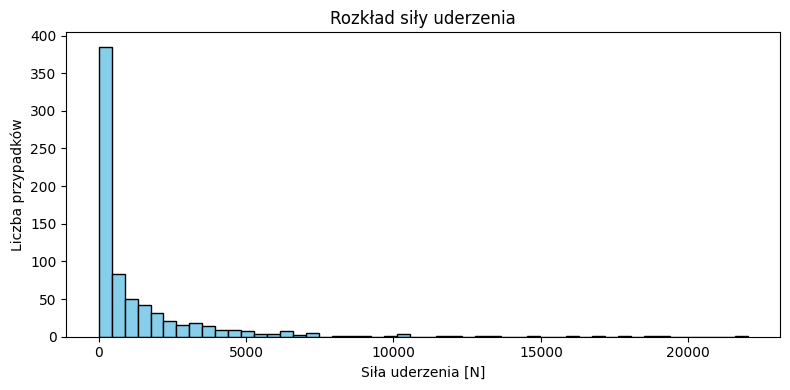

Bin edges (log): [1.00000000e+00 1.22138152e+00 1.49177282e+00 1.82202376e+00
 2.22538616e+00 2.71804553e+00 3.31977059e+00 4.05470646e+00
 4.95234355e+00 6.04870091e+00 7.38777153e+00 9.02328764e+00
 1.10208768e+01 1.34606953e+01 1.64406445e+01 2.00802994e+01
 2.45257067e+01 2.99552450e+01 3.65867827e+01 4.46864204e+01
 5.45791681e+01 6.66619875e+01 8.14197198e+01 9.94445413e+01
 1.21459725e+02 1.48348664e+02 1.81190317e+02 2.21302506e+02
 2.70294791e+02 3.30133064e+02 4.03218424e+02 4.92483533e+02
 6.01510287e+02 7.34673551e+02 8.97316700e+02 1.09596604e+03
 1.33859267e+03 1.63493235e+03 1.99687616e+03 2.43894765e+03
 2.97888559e+03 3.63835582e+03 4.44382057e+03 5.42760034e+03
 6.62917077e+03 8.09674669e+03 9.88921680e+03 1.20785067e+04
 1.47524649e+04 1.80183880e+04 2.20073262e+04]
Histogram (zliczenia): [ 0  0  0  1  1  2  5  5  4  3  4  2  7  3  8  3 11 10 14 10 16 17 25 21
 44 39 34 29 24 27 25 18 25 31 22 25 33 26 31 18 25 19 18 14  7  4  5  2
  4  3]
Prawdopodobieństwa histogra

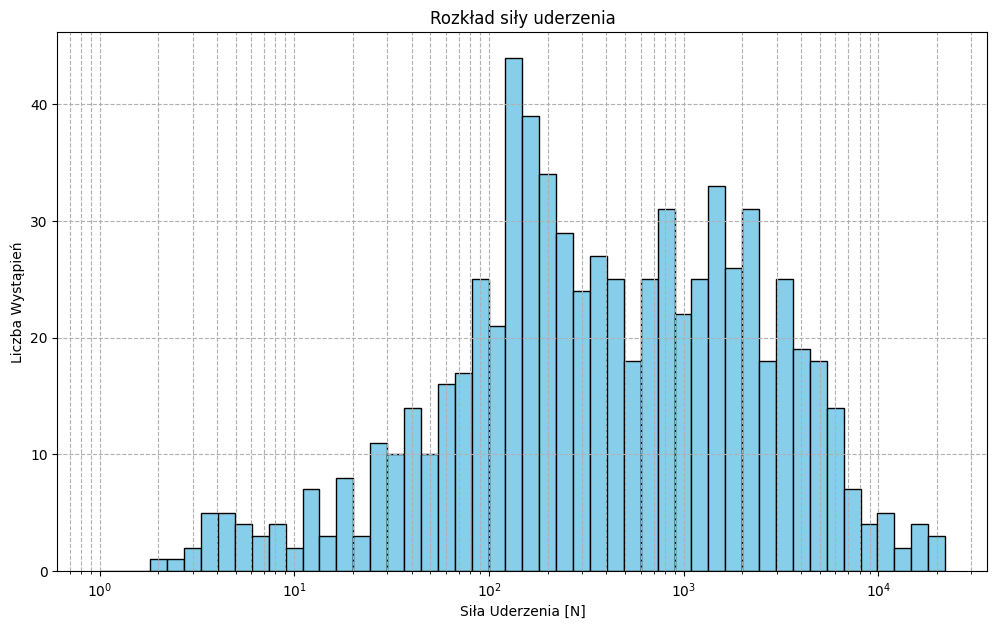

In [6]:
impact_magnitudes = []
not_zero_impacts = 0
for race in data:
    race = np.array(race)
    # Zakładam, że mLastImpactMagnitude to jedna z ostatnich 24 cech, np. indeks 1
    impact_magnitudes.extend(race[:, 13])  # -23 jeśli to druga cecha z końca, popraw jeśli inny indeks


for magnitude in impact_magnitudes:
    if magnitude > 0:
        not_zero_impacts += 1


prob_imp = not_zero_impacts / len(impact_magnitudes)
print("Prawdopodobieństwo wystąpienia uderzenia:", prob_imp)

impact_magnitudes = np.array(impact_magnitudes)




# Zbierz wszystkie wartości siły uderzenia
impact_magnitudes = []
for race in data:
    race = np.array(race)
    impact_magnitudes.extend(race[:, 13])  # -26 jeśli to druga cecha z końca

impact_magnitudes = np.array(impact_magnitudes)

impact_magnitudes = impact_magnitudes[impact_magnitudes > 0]  # tylko wartości większe niż 0

# Policz histogram (np. 20 przedziałów)
# hist, bin_edges = np.histogram(impact_magnitudes, bins=90, density=True)
# print("Bin edges:", bin_edges)
# probabilities = hist / hist.sum()  # prawdopodobieństwa dla każdego przedziału
# print(probabilities)
print(max(impact_magnitudes))
plt.figure(figsize=(8, 4))
plt.hist(impact_magnitudes, bins=50, color='skyblue', edgecolor='black')
plt.title("Rozkład siły uderzenia")
plt.xlabel("Siła uderzenia [N]")
plt.ylabel("Liczba przypadków")
plt.tight_layout()
plt.show()

min_val = np.min(impact_magnitudes)
max_val = np.max(impact_magnitudes) # np. 22000

# Użyj np. 1.0 jako absolutnego minimum, jeśli min_val jest bardzo małe
min_exp = np.log10(max(1.0, min_val)) 
max_exp = np.log10(max_val)

# num=51 da 50 binów
log_bin_edges = np.logspace(min_exp, max_exp, num=51)

# 3. Stwórz histogram (zliczający) używając tych binów
hist, bin_edges = np.histogram(impact_magnitudes, bins=log_bin_edges, density=False)

# 4. Przekształć zliczenia na prawdopodobieństwa
# To jest PMF dla uderzeń > 0
probabilities_hist = hist / hist.sum()

print("Bin edges (log):", bin_edges)
print("Histogram (zliczenia):", hist)
print("Prawdopodobieństwa histogramu:", probabilities_hist)

# Oblicz szerokość każdego słupka (w skali logarytmicznej!)
# Musimy użyć 'bin_edges'
bar_widths = bin_edges[1:] - bin_edges[:-1]

# Oblicz środek każdego słupka (dla etykiet osi X)
bar_centers = bin_edges[:-1] + bar_widths / 2.0

# --- Krok 2: Narysuj wykres ---
plt.figure(figsize=(12, 7))

# Stwórz wykres słupkowy
# 'hist' to wysokość (zliczenia)
# 'bin_edges' to pozycje na osi X
# 'width' to szerokość każdego słupka
plt.bar(bin_edges[:-1], hist, width=bar_widths, align='edge', edgecolor='black', color='skyblue')

# --- Krok 3: Ustaw oś X na logarytmiczną (KLUCZOWE!) ---
# To sprawi, że słupki będą wyglądały na równe wizualnie
plt.xscale('log')

# --- Krok 4: Dodaj etykiety i pokaż ---
plt.xlabel('Siła Uderzenia [N]')
plt.ylabel('Liczba Wystąpień')
plt.title('Rozkład siły uderzenia')
plt.grid(True, which="both", ls="--") # Pokaż siatkę

# Pokaż wykres
plt.show()

# # 5. Zapisz wyniki
# np.save('probabilities.npy', probabilities_hist)
# np.save('bin_edges.npy', bin_edges)

np.save('E:/pracadyp/Race-optimization-reinforcement-learning/data/probabilities_impact/probabilities.npy', probabilities_hist)
np.save('E:/pracadyp/Race-optimization-reinforcement-learning/data/probabilities_impact/bin_edges.npy', bin_edges)


Map damages to impact magnitude

In [ ]:
import numpy as np
import pandas as pd

# --- 1. Inicjalizacja list (POZA pętlą 'for race...') ---
all_impacts_t = []
all_dents_before_flat = [] # Stan w t-1
all_dents_after_flat = []  # Stan w t

print("Rozpoczynam zbieranie danych przejściowych (logika t-1 -> t)...")

for race in data:
    race = np.array(race)
    
    if len(race) < 2:
        continue # Pomiń wyścigi krótsze niż 2 kroki

    # 1. Stwórz "przesunięte" tablice, aby uzyskać pary (t-1) -> (t)
    
    # Stan wgnieceń w kroku 't-1' (ignorujemy ostatni krok)
    dents_t_minus_1 = race[:-1, 20:28] # Kolumny 20-27
    
    # Stan wgnieceń w kroku 't' (ignorujemy pierwszy krok)
    dents_t = race[1:, 20:28] 

    # Siła uderzenia w kroku 't' (ignorujemy pierwszy krok)
    impacts_t = race[1:, 13]
    
    # 2. Spłaszcz 8 elementów wgnieceń
    dents_t_minus_1_flat = dents_t_minus_1.flatten()
    dents_t_flat = dents_t.flatten()
    
    # 3. Powtórz impakty 8 razy, aby pasowały
    impacts_t_flat = np.repeat(impacts_t, 8)
    
    # 4. Rozszerz główne listy
    all_impacts_t.extend(impacts_t_flat)
    all_dents_before_flat.extend(dents_t_minus_1_flat)
    all_dents_after_flat.extend(dents_t_flat)

# --- 2. Konwersja na tablice NumPy ---
all_impacts_t = np.array(all_impacts_t)
all_dents_before_flat = np.array(all_dents_before_flat)
all_dents_after_flat = np.array(all_dents_after_flat)

print(f"Zebrano łącznie {len(all_impacts_t)} próbek przejściowych.")

import pandas as pd # Import pandas dla ładnego wyświetlania tabeli

# --- 3. Filtrowanie danych (Twoje reguły) ---
mask_impact_happened = all_impacts_t > 0
mask_can_be_damaged = all_dents_before_flat < 2.0 # Użyj stanu 'before' (t-1)
valid_mask = mask_impact_happened & mask_can_be_damaged

impacts_to_analyze = all_impacts_t[valid_mask]
dents_before_to_analyze = all_dents_before_flat[valid_mask]
dents_after_to_analyze = all_dents_after_flat[valid_mask]

# --- 4. Oblicz "Deltę" (o ile zmienił się stan) ---
delta_dents = dents_after_to_analyze - dents_before_to_analyze

print(f"Znaleziono {len(impacts_to_analyze)} ważnych próbek uszkodzeń.")

# --- 5. Stwórz Biny (Progi) ---
if len(impacts_to_analyze) > 0:
    min_val_safe = max(1.0, np.min(impacts_to_analyze))
    min_exp = np.log10(min_val_safe)
    max_exp = np.log10(np.max(impacts_to_analyze))
    num_bins = 20
    bin_edges = np.logspace(min_exp, max_exp, num=num_bins + 1)
    
    bin_indices = np.digitize(impacts_to_analyze, bins=bin_edges)

    # --- 6. Oblicz Prawdopodobieństwa dla każdego Progu ---
    damage_map_list = []
    
    for i in range(1, num_bins + 1):
        deltas_in_this_bin = delta_dents[bin_indices == i]
        total_in_bin = len(deltas_in_this_bin)
        
        bin_range = f"[{bin_edges[i-1]:.0f} - {bin_edges[i]:.0f})"
        
        if total_in_bin == 0:
            prob_map = {'Próg Siły [N]': bin_range, 'Liczba Próbek': 0, 'P(Zmiana = 1)': 0.0, 'P(Zmiana = 2)': 0.0}
        else:
            p1 = np.sum(deltas_in_this_bin == 1) / total_in_bin
            p2 = np.sum(deltas_in_this_bin == 2) / total_in_bin
            
            prob_map = {
                'Próg Siły [N]': bin_range,
                'Liczba Próbek': total_in_bin,
                'P(Zmiana = 1)': p1,
                'P(Zmiana = 2)': p2
            }
        damage_map_list.append(prob_map)

    # --- 7. Wyświetl finalną "Mapę" ---
    df_damage_map = pd.DataFrame(damage_map_list)
    pd.set_option('display.precision', 3) 

    print("\n--- (POPRAWIONA) Mapa Prawdopodobieństwa Zmiany Wgniecenia ---")
    print(df_damage_map.to_string())
else:
    print("Nie znaleziono żadnych próbek uszkodzeń spełniających kryteria.")